# Import library and Data

In [ ]:
!pip install "pandas>=2.0.0"
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore (1).csv


In [ ]:
df = pd.read_csv("googleplaystore.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Data Exploration and Cleaning

In [ ]:
# Check for null values
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# Clean data remove null cat and add install column
df2 = df.dropna(axis=0, subset=['Category']) #to drop row with null category
df2['Install_1'] = df['Installs'].map(lambda x : int(x.rstrip('+').replace(",","" ))) # to remove '+' and ',' from Installs and cast to int
df2['Price'] = df['Price'].map(lambda x : float(x.replace("$","" ))) #to convert price from string to float
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Install_1       10840 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


<ipython-input-43-66b6d6d25718>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Install_1'] = df['Installs'].map(lambda x : int(x.rstrip('+').replace(",","" ))) # to remove '+' and ',' from Installs and cast to int
<ipython-input-43-66b6d6d25718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = df['Price'].map(lambda x : float(x.replace("$","" ))) #to convert price from string to float


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install_1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,100000


# Setting

In [ ]:
# Setting
title_color = '#1C658C'
subtitle_color = '#398AB9'
axis_title_color = '#4CA1A3'
axis_color = '#4CA1A3'
bar_width = 0.8
bar_color_1 = '#F266AB'
bar_color_2 = '#A459D1'
line_color_1 = '#F79540'

# 1 No of app in each category

## Create dataframe

In [ ]:
df3 = df2[['Category','App']].groupby(['Category']).count().sort_values(by='App',ascending=True)
df3 = df3.reset_index()
df3.head(10)

,Category,App
0,BEAUTY,53
1,PARENTING,60
2,COMICS,60
3,EVENTS,64
4,ART_AND_DESIGN,65
5,WEATHER,82
6,AUTO_AND_VEHICLES,85
7,LIBRARIES_AND_DEMO,85
8,HOUSE_AND_HOME,88
9,FOOD_AND_DRINK,127


## Graph

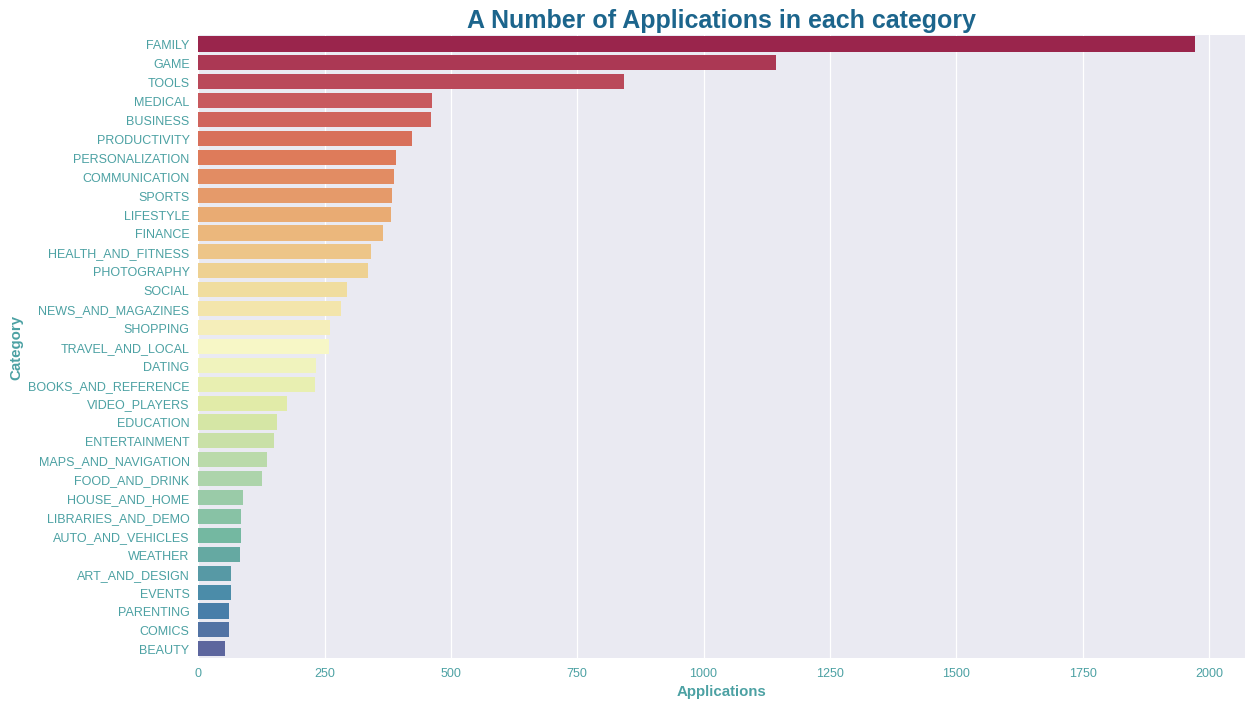

In [ ]:
fig, ax = plt.subplots(figsize=(15,9),dpi=90)
ax.set_title('A Number of Applications in each category',fontsize = 20, weight = 'bold',color=title_color)

plott = sns.barplot(y=df3['Category'],
                    x=df3['App'],
                    data = df3,
                    order=df3.sort_values(
                        by='App', ascending=False)['Category'],
                    palette='Spectral')
plott.set_ylabel('Category', fontsize=12, weight = 'bold',color=axis_title_color)
plott.set_xlabel('Applications', fontsize=12, weight = 'bold',color=axis_title_color)
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)
_= plt.setp(plt.gca().get_xticklabels(),fontsize=10,color=axis_color)


# 2 installations

## Create dataframe

In [ ]:
df10 = df2[['App','Category','Install_1']]
df11 = df10.groupby('Category').agg({'Install_1':'sum'}).sort_values(by='Install_1',ascending=False).reset_index()
df11

,Category,Install_1
0,GAME,35086024415
1,COMMUNICATION,32647276251
2,PRODUCTIVITY,14176091369
3,SOCIAL,14069867902
4,TOOLS,11452771915
5,FAMILY,10258263505
6,PHOTOGRAPHY,10088247655
7,NEWS_AND_MAGAZINES,7496317760
8,TRAVEL_AND_LOCAL,6868887146
9,VIDEO_PLAYERS,6222002720


## Graph

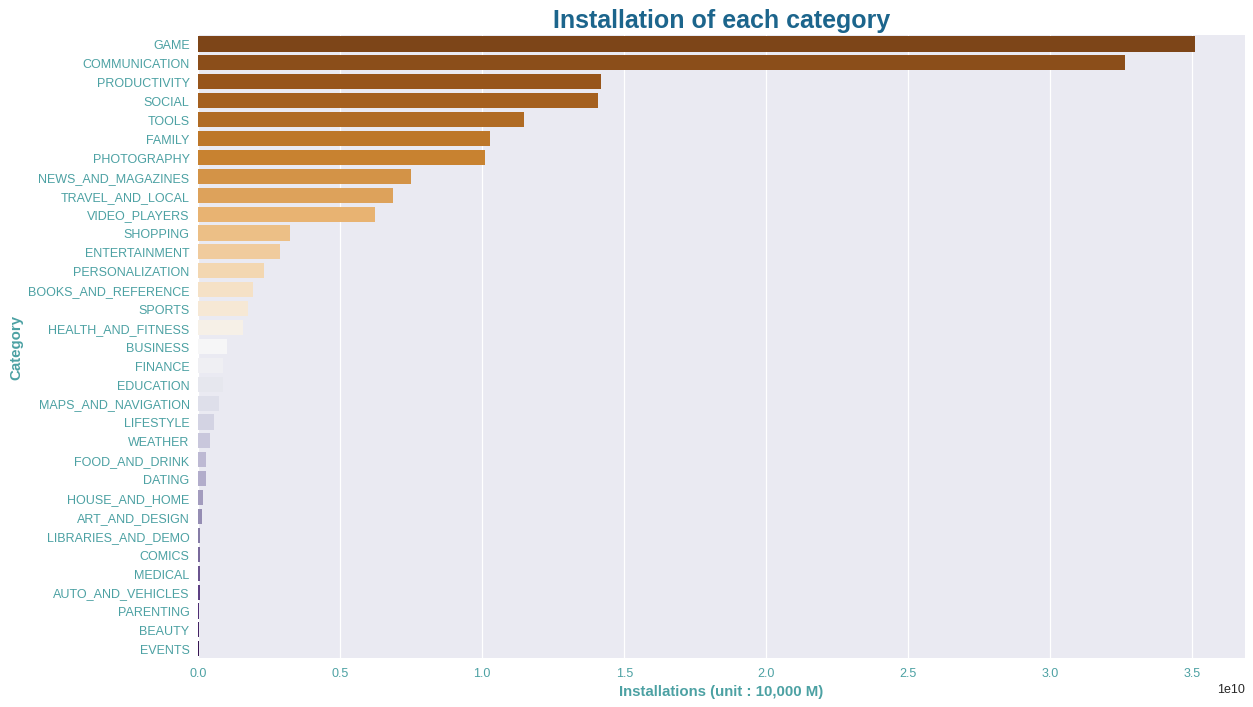

In [ ]:
fig, ax = plt.subplots(figsize=(15,9),dpi=90)
ax.set_title('Installation of each category',fontsize = 20, weight = 'bold',color=title_color)

plott = sns.barplot(y=df11['Category'],
                    x=df11['Install_1'],
                    data = df11,
                    order=df11.sort_values(
                        by='Install_1', ascending=False)['Category'],
                    palette='PuOr')
plott.set_ylabel('Category', fontsize=12, weight = 'bold',color=axis_title_color)
plott.set_xlabel('Installations (unit : 10,000 M)', fontsize=12, weight = 'bold',color=axis_title_color)
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)
_= plt.setp(plt.gca().get_xticklabels(),fontsize=10,color=axis_color)


# 3 app > 1 m installations

## Create dataframe

In [ ]:
df3 = df2.loc[df2['Install_1']>=1000000] #เลือกcolumn app category install_1 เพื่อมาสร้างตาราง
df5 = pd.pivot_table( df3,index=['Category'], columns=['Install_1'], values=['App'] , aggfunc={'App':'count'} ,fill_value=0,margins = True, margins_name='Total') #สร้างตารางpivot table ของแต่ละcategory โดยแบ่งตามยอดinstall
df5

App                                                \
Install_1           1000000 5000000 10000000 50000000 100000000 500000000   
Category                                                                    
ART_AND_DESIGN            4       3        5        1         0         0   
AUTO_AND_VEHICLES        13       3        2        0         0         0   
BEAUTY                    8       1        1        0         0         0   
BOOKS_AND_REFERENCE      20      10       24        0         6         0   
BUSINESS                 46      23       18        7         3         0   
COMICS                   12       4        2        0         0         0   
COMMUNICATION            45      25       57       10        39        17   
DATING                   32       9       17        0         0         0   
EDUCATION                52      22       30        0         4         0   
ENTERTAINMENT            51      17       48        5        10         0   
EVENTS                    4       2        0        0         0         0   
FAMILY                  275     123      178       42        29         3   
FINANCE                  63      24       18        2         4         0   
FOOD_AND_DRINK           33      13       17        0         0         0   
GAME                    166     105      225       84       134        17   
HEALTH_AND_FITNESS       68      33       48        5         1         1   
HOUSE_AND_HOME           27       5       11        0         0         0   
LIBRARIES_AND_DEMO        8       2        4        0         0         0   
LIFESTYLE                46      17       24        1         1         0   
MAPS_AND_NAVIGATION      26      17       11        2         4         0   
MEDICAL                  23       3        0        0         0         0   
NEWS_AND_MAGAZINES       54      17       30        1         0         6   
PARENTING                13       1        1        0         0         0   
PERSONALIZATION          47      21       36        8        14         0   
PHOTOGRAPHY              54      31       72       27        38         0   
PRODUCTIVITY             59      23       49       14        38        10   
SHOPPING                 45      24       62       11        19         0   
SOCIAL                   35      27       49       14        17         6   
SPORTS                   53      57       50       10         4         0   
TOOLS                   101      41       87       23        26         9   
TRAVEL_AND_LOCAL         42      34       35        6        10         0   
VIDEO_PLAYERS            33       7       30       11         8         3   
WEATHER                  21       8       11        5         0         0   
Total                  1579     752     1252      289       409        72   

                                      
Install_1           1000000000 Total  
Category                              
ART_AND_DESIGN               0    13  
AUTO_AND_VEHICLES            0    18  
BEAUTY                       0    10  
BOOKS_AND_REFERENCE          1    61  
BUSINESS                     0    97  
COMICS                       0    18  
COMMUNICATION               19   212  
DATING                       0    58  
EDUCATION                    0   108  
ENTERTAINMENT                1   132  
EVENTS                       0     6  
FAMILY                       1   651  
FINANCE                      0   111  
FOOD_AND_DRINK               0    63  
GAME                         6   737  
HEALTH_AND_FITNESS           0   156  
HOUSE_AND_HOME               0    43  
LIBRARIES_AND_DEMO           0    14  
LIFESTYLE                    0    89  
MAPS_AND_NAVIGATION          0    60  
MEDICAL                      0    26  
NEWS_AND_MAGAZINES           4   112  
PARENTING                    0    15  
PERSONALIZATION              0   126  
PHOTOGRAPHY                  4   226  
PRODUCTIVITY                 4   197  
SHOPPING                     0   161  
SOCI

In [ ]:
df5.columns = [''.join(str(s).strip() for s in col if s) for col in df5.columns] #เปลี่ยนชื่อหัว column เพื่อ sort
df5.sort_values(by=['AppTotal'],ascending=False) #sort column AppTotal โดยเรียงจากมากไปน้อย

,App1000000,App5000000,App10000000,App50000000,App100000000,App500000000,App1000000000,AppTotal
Category,,,,,,,,
Total,1579,752,1252,289,409,72,58,4411
GAME,166,105,225,84,134,17,6,737
FAMILY,275,123,178,42,29,3,1,651
TOOLS,101,41,87,23,26,9,2,289
PHOTOGRAPHY,54,31,72,27,38,0,4,226
COMMUNICATION,45,25,57,10,39,17,19,212
PRODUCTIVITY,59,23,49,14,38,10,4,197
SPORTS,53,57,50,10,4,0,0,174
SHOPPING,45,24,62,11,19,0,0,161


#4 Application in type wise (free and paid)

## Create dataframe

In [ ]:
df4 = df2.loc[:,['Install_1','Type','App']] #สร้างตารางโดยเลือกcolumn install_1 type app
dfpi = pd.pivot_table( df4,index=['Install_1'], columns=['Type'], values=['App'] , aggfunc={'App':'count'} ,fill_value=0).reset_index() #สร้างตารางpivot table ของแต่ละยอดinstall โดยแบ่งตามประเภทการจ่ายเงิน
df4 = df2.loc[:,['Install_1','Type','App']] #สร้างตารางโดยเลือกcolumn install_1 type app
dfpi = pd.pivot_table( df4,index=['Install_1'], columns=['Type'], values=['App'] , aggfunc={'App':'count'} ,fill_value=0)
dfpi.columns = ['_'.join(str(s).strip() for s in col if s) for col in dfpi.columns]
dfpi = dfpi.reset_index()
dfpi #สร้างตารางpivot table ของแต่ละยอดinstall โดยแบ่งตามประเภทการจ่ายเงิน

,Install_1,App_Free,App_Paid
0,0,4,10
1,1,46,21
2,5,70,12
3,10,316,70
4,50,171,34
5,100,623,96
6,500,290,40
7,1000,758,149
8,5000,410,67
9,10000,925,129


In [ ]:
dfpi = dfpi.loc[dfpi['Install_1']>=1000000]
dfpi['Install_1'] = dfpi['Install_1'].astype(str)
dfpi

<ipython-input-52-adbe62b25943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpi['Install_1'] = dfpi['Install_1'].astype(str)


,Install_1,App_Free,App_Paid
13,1000000,1555,24
14,5000000,752,0
15,10000000,1249,3
16,50000000,289,0
17,100000000,409,0
18,500000000,72,0
19,1000000000,58,0


## Graph

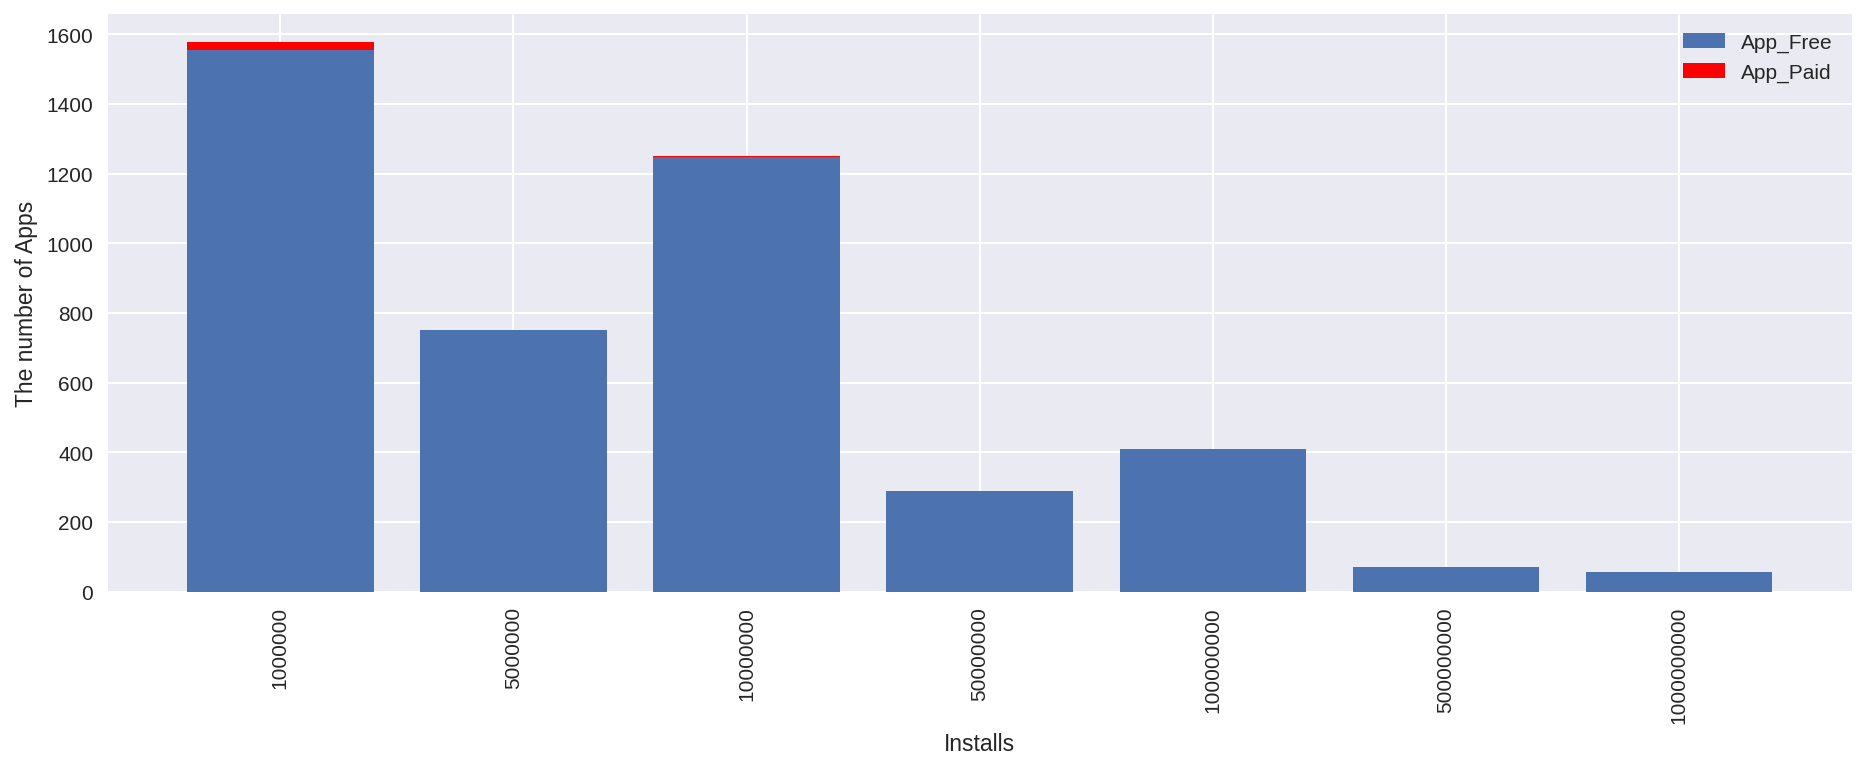

In [ ]:
# Plot VERTICAL stacked bar graphs for all teams using the 'bottom' parameter

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot การใช้กราฟบาร์ที่วางต่อกัน
bottoms = pd.Series( [0] * df.shape[0] )
bottoms = 0     # Each bar plot of the first team has the bottom of bar at y=0

plt.bar( x=dfpi['Install_1'], height=dfpi['App_Free'],
           label='App_Free',  # Set label to be used in the legend
           bottom=bottoms )  # The y coordinates of the bars bases (default:0)
bottoms += dfpi['App_Free'].fillna(0)
plt.bar( x=dfpi['Install_1'], height=dfpi['App_Paid'],
           label='App_Paid',  # Set label to be used in the legend
           bottom=bottoms, # The y coordinates of the bars bases (default:0)
          color = 'red'
          )
bottoms += dfpi['App_Paid'].fillna(0)

plt.legend()          # Add legend to the graph
plt.xlabel("Installs")                  # Add x-labels
plt.ylabel("The number of Apps")   # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

# 5 Paid app by category

## Create dataframe

In [ ]:
df3 = df2[ df2['Type'] == 'Paid' ][ ['Category','Type'] ]
df4 = df3['Category'].value_counts()
df4

Category
FAMILY                 191
MEDICAL                109
GAME                    83
PERSONALIZATION         83
TOOLS                   78
PRODUCTIVITY            28
BOOKS_AND_REFERENCE     28
COMMUNICATION           27
SPORTS                  24
PHOTOGRAPHY             22
LIFESTYLE               19
FINANCE                 17
HEALTH_AND_FITNESS      16
BUSINESS                14
TRAVEL_AND_LOCAL        12
WEATHER                  8
DATING                   7
MAPS_AND_NAVIGATION      5
EDUCATION                4
VIDEO_PLAYERS            4
AUTO_AND_VEHICLES        3
SOCIAL                   3
ART_AND_DESIGN           3
FOOD_AND_DRINK           2
ENTERTAINMENT            2
NEWS_AND_MAGAZINES       2
SHOPPING                 2
PARENTING                2
LIBRARIES_AND_DEMO       1
EVENTS                   1
Name: count, dtype: int64

## Graph

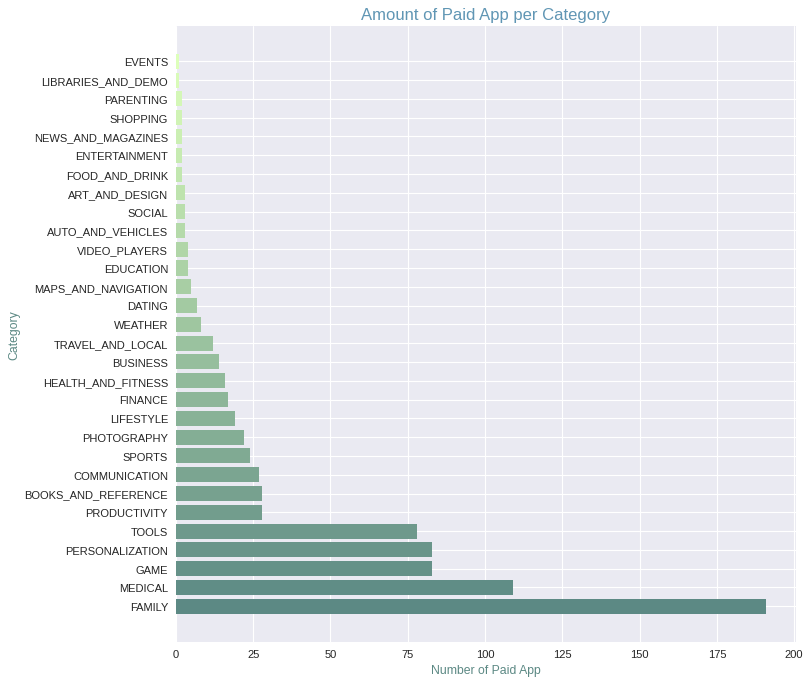

In [ ]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

plt.figure(figsize=(10,10),dpi=80)
plt.barh( y=df4.index, width=df4 , color = get_color_gradient('#5C8984', '#DDFFBB', len(df4)) )
plt.xlabel("Number of Paid App", color='#5C8984')
plt.ylabel("Category", color='#5C8984')
plt.title("Amount of Paid App per Category", color='#6096B4').set_fontsize(15)


#6 Paid app with the most net value

## Create dataframe

In [ ]:
df4 = df2.loc[df2['Type']=='Paid'][['Category','App','Type','Price','Install_1']] #.groupby(['Category']).count().sort_values(by='App',ascending=True)
df4

,Category,App,Type,Price,Install_1
234,BUSINESS,TurboScan: scan documents and receipts in PDF,Paid,4.99,100000
235,BUSINESS,Tiny Scanner Pro: PDF Doc Scan,Paid,4.99,100000
290,BUSINESS,TurboScan: scan documents and receipts in PDF,Paid,4.99,100000
291,BUSINESS,Tiny Scanner Pro: PDF Doc Scan,Paid,4.99,100000
427,COMMUNICATION,Puffin Browser Pro,Paid,3.99,100000
...,...,...,...,...,...
10735,FAMILY,FP VoiceBot,Paid,0.99,100
10760,HEALTH_AND_FITNESS,Fast Tract Diet,Paid,7.99,1000
10782,GAME,Trine 2: Complete Story,Paid,16.99,10000
10785,FAMILY,"sugar, sugar",Paid,1.20,10000


In [ ]:
df5 = pd.pivot_table(df4,index=['Category'],values=['Price','Install_1'],aggfunc={'Price': np.mean,'Install_1': np.mean})
df5 = df5.reset_index().rename(columns={'Install_1':'Avg installation','Price':'Avg Price'})
df5['Net value'] = df5['Avg installation']*df5['Avg Price']
df5['Net value'] = df5['Net value'].map(lambda x : int(x))
df5 = df5.sort_values(by=['Net value'],ascending=False)
df5.head(10)


,Category,Avg installation,Avg Price,Net value
15,LIFESTYLE,62058.421053,124.256316,7711150
9,FAMILY,163726.774869,12.747539,2087113
10,FINANCE,10917.764706,170.637059,1862975
21,PHOTOGRAPHY,180851.818182,6.100455,1103278
12,GAME,254216.445783,3.461446,879956
6,EDUCATION,150500.000000,4.490000,675745
22,PRODUCTIVITY,50430.535714,8.961786,451947
29,WEATHER,101500.000000,4.052500,411328
7,ENTERTAINMENT,100000.000000,3.990000,399000
3,BUSINESS,29483.928571,13.233571,390177


## Graph

Text(0.5, 1.0, 'Average Price and Installation')

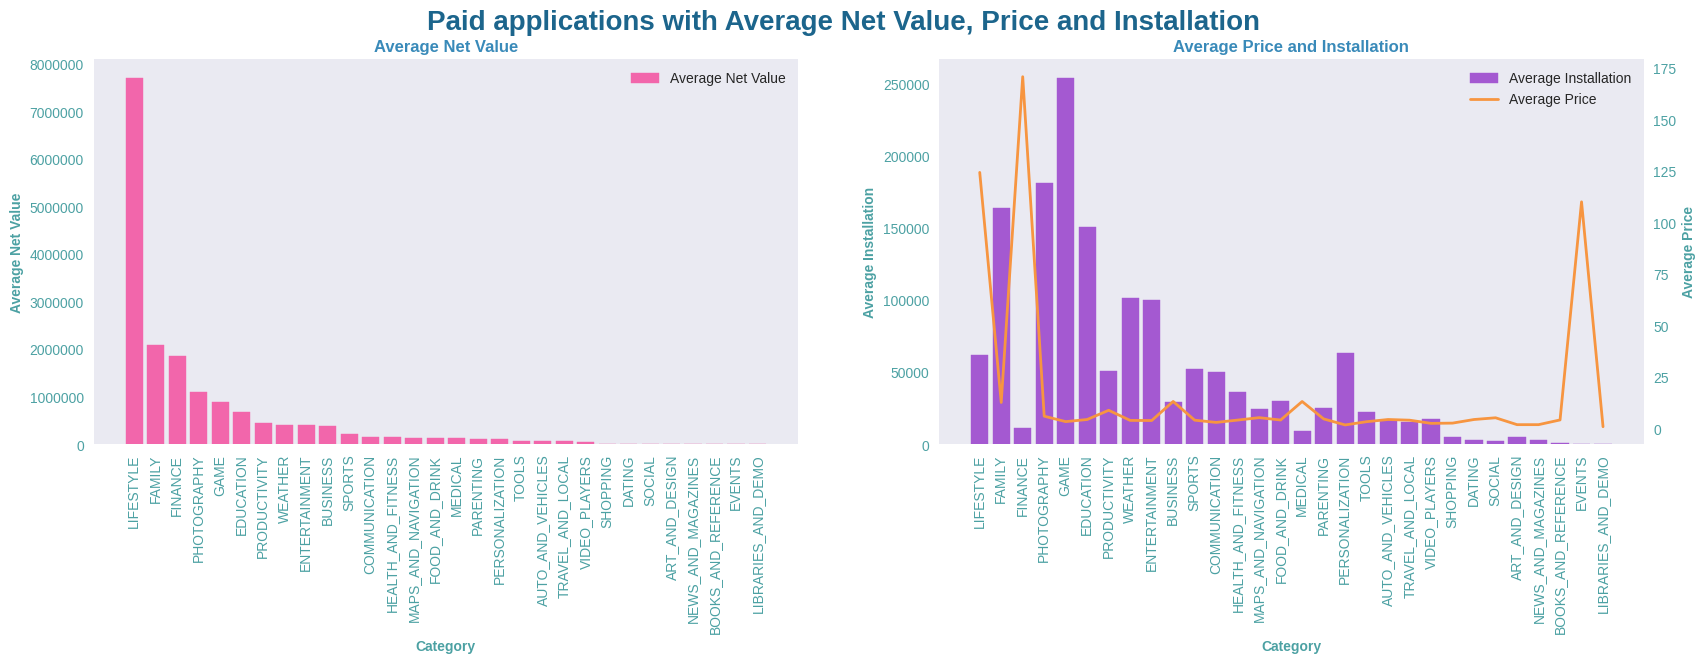

In [ ]:
# Graph Preparation
fig = plt.figure(figsize=(20,5))
fig.suptitle('Paid applications with Average Net Value, Price and Installation',fontsize = 20, weight = 'bold',color=title_color)

# Create Net value graph
ax1 = plt.subplot(1,2,1)
ax1.bar(x=df5['Category'],height=df5['Net value'],label='Average Net Value', color=bar_color_1,edgecolor=bar_color_1, width = bar_width)
ax1.legend(loc='upper right',fontsize = 10)
ax1.set_xlabel('Category', fontsize=10,color=axis_title_color, weight = 'bold')
ax1.set_ylabel('Average Net Value', fontsize=10,color=axis_title_color, weight = 'bold')
ax1.yaxis.grid(linestyle='')
ax1.xaxis.grid(linestyle='')
ax1.yaxis.get_major_formatter().set_scientific(False)
_= plt.setp(plt.gca().get_xticklabels(),rotation=90,fontsize=10,color=axis_color)
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)

plt.title('Average Net Value',fontsize = 12 , weight = 'bold',color=subtitle_color)

# Create Price and Installation graph
## Plot bar graph
# Create subplot
ax2 = plt.subplot(1,2,2)
bar = ax2.bar(x=df5['Category'],height=df5['Avg installation'],label='Average Installation', width = bar_width,color=bar_color_2,edgecolor=bar_color_2)
ax2.yaxis.grid(linestyle='')
ax2.xaxis.grid(linestyle='')
ax2.set_xlabel('Category', fontsize=10,color=axis_title_color, weight = 'bold')
ax2.set_ylabel('Average Installation', fontsize=10,color=axis_title_color, weight = 'bold')
_= plt.setp(plt.gca().get_xticklabels(),rotation=90,fontsize=10,color=axis_color)
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)

# Plot line
ax3 = ax2.twinx()
line = ax3.plot(df5['Category'],df5['Avg Price'],color=line_color_1,label='Average Price',linewidth=2)
ax3.set_ylabel('Average Price', fontsize=10,color=axis_title_color, weight = 'bold')
ax3.yaxis.grid(linestyle='')
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)

## create legend
myl=[bar]+line
labs=[l.get_label() for l in myl]
ax2.legend(myl, labs, loc='upper right',fontsize = 10)

plt.title('Average Price and Installation',fontsize = 12 , weight = 'bold',color=subtitle_color)

#7 Net value > 500000

## Create dataframe

In [ ]:
df6 = df5.loc[df5['Net value']>=500000]
df6

,Category,Avg installation,Avg Price,Net value
15,LIFESTYLE,62058.421053,124.256316,7711150
9,FAMILY,163726.774869,12.747539,2087113
10,FINANCE,10917.764706,170.637059,1862975
21,PHOTOGRAPHY,180851.818182,6.100455,1103278
12,GAME,254216.445783,3.461446,879956
6,EDUCATION,150500.000000,4.490000,675745


## Graph

Text(0.5, 1.0, 'Average Price and Installation')

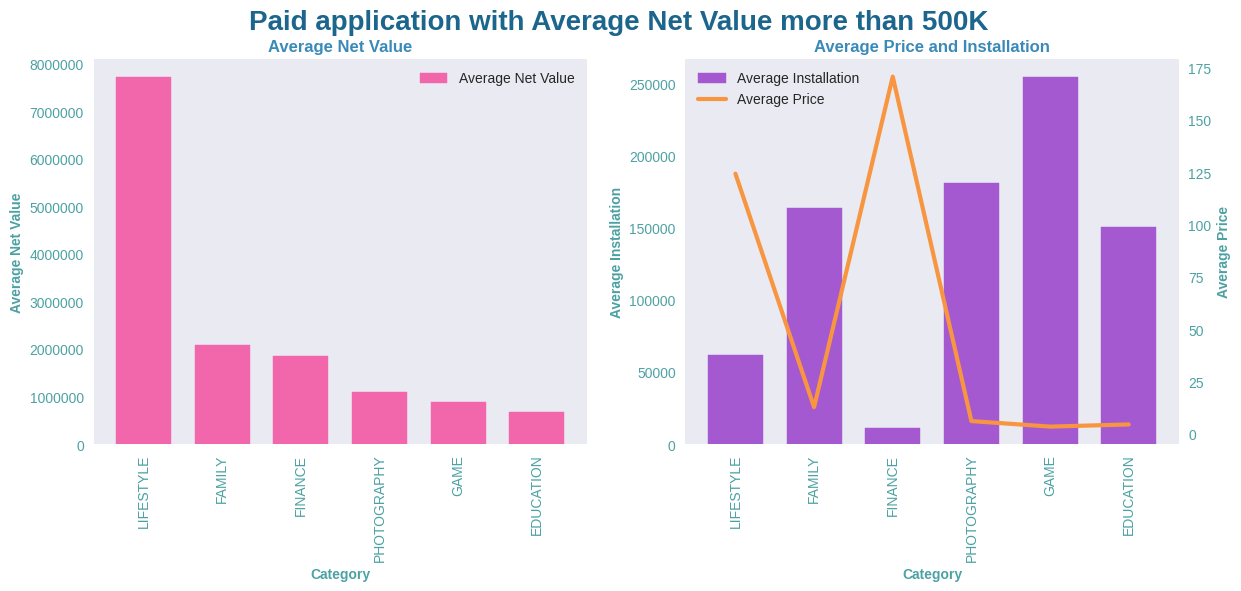

In [ ]:
fig = plt.figure(figsize=(14,5),dpi=100)
fig.suptitle('Paid application with Average Net Value more than 500K',fontsize = 20, weight = 'bold',color=title_color)

bar_width = 0.5

# Create Net value graph
ax1 = plt.subplot(1,2,1)
ax1.bar(x=df6['Category'],height=df6['Net value'],label='Average Net Value', width = 0.7, color=bar_color_1,edgecolor=bar_color_1)
ax1.legend(loc='upper right',fontsize = 10)
ax1.yaxis.grid(linestyle='')
ax1.xaxis.grid(linestyle='')
ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.set_xlabel('Category', fontsize=10,color=axis_title_color, weight = 'bold')
ax1.set_ylabel('Average Net Value', fontsize=10,color=axis_title_color, weight = 'bold')
_= plt.setp(plt.gca().get_xticklabels(),rotation=90,fontsize=10,color=axis_color)
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)

plt.title('Average Net Value',fontsize = 12 , weight = 'bold',color=subtitle_color)

# Create Price and Installation graph
## Plot bar graph
# Create subplot
ax2 = plt.subplot(1,2,2)
bar = ax2.bar(x=df6['Category'],height=df6['Avg installation'],label='Average Installation', width = 0.7, color=bar_color_2,edgecolor=bar_color_2)
ax2.yaxis.grid(linestyle='')
ax2.xaxis.grid(linestyle='')
ax2.set_xlabel('Category', fontsize=10,color=axis_title_color, weight = 'bold')
ax2.set_ylabel('Average Installation', fontsize=10,color=axis_title_color, weight = 'bold')
_= plt.setp(plt.gca().get_xticklabels(),rotation=90,fontsize=10,color=axis_color)
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)

# Plot line
ax3 = ax2.twinx()
line = ax3.plot(df6['Category'],df6['Avg Price'],color=line_color_1,label='Average Price',linewidth=3)
ax3.yaxis.grid(linestyle='')
ax3.set_ylabel('Average Price', fontsize=10,color=axis_title_color, weight = 'bold')
_= plt.setp(plt.gca().get_yticklabels(),fontsize=10,color=axis_color)

## create legend
myl=[bar]+line
labs=[l.get_label() for l in myl]
ax2.legend(myl, labs, loc='upper left',fontsize = 10)

plt.title('Average Price and Installation',fontsize = 12 , weight = 'bold',color=subtitle_color)